In [122]:
# Import our dependencies

import pandas as pd
import seaborn as sns
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [123]:
# Import our input dataset
cancer_df = pd.read_csv('./Data_Set/METABRIC_RNA_Mutation.csv')
cancer_df.head()

C:\Users\rodri\AppData\Local\Temp\ipykernel_5764\2649696336.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  cancer_df = pd.read_csv('./Data_Set/METABRIC_RNA_Mutation.csv')


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [124]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [125]:
column_names = cancer_df.columns.tolist()
column_names

['patient_id',
 'age_at_diagnosis',
 'type_of_breast_surgery',
 'cancer_type',
 'cancer_type_detailed',
 'cellularity',
 'chemotherapy',
 'pam50_+_claudin-low_subtype',
 'cohort',
 'er_status_measured_by_ihc',
 'er_status',
 'neoplasm_histologic_grade',
 'her2_status_measured_by_snp6',
 'her2_status',
 'tumor_other_histologic_subtype',
 'hormone_therapy',
 'inferred_menopausal_state',
 'integrative_cluster',
 'primary_tumor_laterality',
 'lymph_nodes_examined_positive',
 'mutation_count',
 'nottingham_prognostic_index',
 'oncotree_code',
 'overall_survival_months',
 'overall_survival',
 'pr_status',
 'radio_therapy',
 '3-gene_classifier_subtype',
 'tumor_size',
 'tumor_stage',
 'death_from_cancer',
 'brca1',
 'brca2',
 'palb2',
 'pten',
 'tp53',
 'atm',
 'cdh1',
 'chek2',
 'nbn',
 'nf1',
 'stk11',
 'bard1',
 'mlh1',
 'msh2',
 'msh6',
 'pms2',
 'epcam',
 'rad51c',
 'rad51d',
 'rad50',
 'rb1',
 'rbl1',
 'rbl2',
 'ccna1',
 'ccnb1',
 'cdk1',
 'ccne1',
 'cdk2',
 'cdc25a',
 'ccnd1',
 'cdk4',

In [126]:
drop_column = ["patient_id", "cancer_type_detailed", "pam50_+_claudin-low_subtype", "tumor_other_histologic_subtype", "integrative_cluster", "3-gene_classifier_subtype", 'pik3ca_mut', 'tp53_mut',
 'muc16_mut',
 'ahnak2_mut',
 'kmt2c_mut',
 'syne1_mut',
 'gata3_mut',
 'map3k1_mut',
 'ahnak_mut',
 'dnah11_mut',
 'cdh1_mut',
 'dnah2_mut',
 'kmt2d_mut',
 'ush2a_mut',
 'ryr2_mut',
 'dnah5_mut',
 'herc2_mut',
 'pde4dip_mut',
 'akap9_mut',
 'tg_mut',
 'birc6_mut',
 'utrn_mut',
 'tbx3_mut',
 'col6a3_mut',
 'arid1a_mut',
 'lama2_mut',
 'notch1_mut',
 'cbfb_mut',
 'ncor2_mut',
 'col12a1_mut',
 'col22a1_mut',
 'pten_mut',
 'akt1_mut',
 'atr_mut',
 'thada_mut',
 'ncor1_mut',
 'stab2_mut',
 'myh9_mut',
 'runx1_mut',
 'nf1_mut',
 'map2k4_mut',
 'ros1_mut',
 'lamb3_mut',
 'arid1b_mut',
 'erbb2_mut',
 'sf3b1_mut',
 'shank2_mut',
 'ep300_mut',
 'ptprd_mut',
 'usp9x_mut',
 'setd2_mut',
 'setd1a_mut',
 'thsd7a_mut',
 'afdn_mut',
 'erbb3_mut',
 'rb1_mut',
 'myo1a_mut',
 'alk_mut',
 'fanca_mut',
 'adgra2_mut',
 'ubr5_mut',
 'pik3r1_mut',
 'myo3a_mut',
 'asxl2_mut',
 'apc_mut',
 'ctcf_mut',
 'asxl1_mut',
 'fancd2_mut',
 'taf1_mut',
 'kdm6a_mut',
 'ctnna3_mut',
 'brca1_mut',
 'ptprm_mut',
 'foxo3_mut',
 'usp28_mut',
 'gldc_mut',
 'brca2_mut',
 'cacna2d3_mut',
 'arid2_mut',
 'aff2_mut',
 'lifr_mut',
 'sbno1_mut',
 'kdm3a_mut',
 'ncoa3_mut',
 'bap1_mut',
 'l1cam_mut',
 'pbrm1_mut',
 'chd1_mut',
 'jak1_mut',
 'setdb1_mut',
 'fam20c_mut',
 'arid5b_mut',
 'egfr_mut',
 'map3k10_mut',
 'smarcc2_mut',
 'erbb4_mut',
 'npnt_mut',
 'nek1_mut',
 'agmo_mut',
 'zfp36l1_mut',
 'smad4_mut',
 'sik1_mut',
 'casp8_mut',
 'prkcq_mut',
 'smarcc1_mut',
 'palld_mut',
 'dcaf4l2_mut',
 'bcas3_mut',
 'cdkn1b_mut',
 'gps2_mut',
 'men1_mut',
 'stk11_mut',
 'sik2_mut',
 'ptpn22_mut',
 'brip1_mut',
 'flt3_mut',
 'nrg3_mut',
 'fbxw7_mut',
 'ttyh1_mut',
 'taf4b_mut',
 'or6a2_mut',
 'map3k13_mut',
 'hdac9_mut',
 'prkacg_mut',
 'rpgr_mut',
 'large1_mut',
 'foxp1_mut',
 'clk3_mut',
 'prkcz_mut',
 'lipi_mut',
 'ppp2r2a_mut',
 'prkce_mut',
 'gh1_mut',
 'gpr32_mut',
 'kras_mut',
 'nf2_mut',
 'chek2_mut',
 'ldlrap1_mut',
 'clrn2_mut',
 'acvrl1_mut',
 'agtr2_mut',
 'cdkn2a_mut',
 'ctnna1_mut',
 'magea8_mut',
 'prr16_mut',
 'dtwd2_mut',
 'akt2_mut',
 'braf_mut',
 'foxo1_mut',
 'nt5e_mut',
 'ccnd3_mut',
 'nr3c1_mut',
 'prkg1_mut',
 'tbl1xr1_mut',
 'frmd3_mut',
 'smad2_mut',
 'sgcd_mut',
 'spaca1_mut',
 'rasgef1b_mut',
 'hist1h2bc_mut',
 'nr2f1_mut',
 'klrg1_mut',
 'mbl2_mut',
 'mtap_mut',
 'ppp2cb_mut',
 'smarcd1_mut',
 'nras_mut',
 'ndfip1_mut',
 'hras_mut',
 'prps2_mut',
 'smarcb1_mut',
 'stmn2_mut',
 'siah1_mut']

In [127]:
# Cleaning data
clean_df = cancer_df.drop(columns= drop_column)
clean_df.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cellularity,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,75.65,MASTECTOMY,Breast Cancer,NaN,0,1.0,Positve,Positive,3.0,NEUTRAL,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,43.19,BREAST CONSERVING,Breast Cancer,High,0,1.0,Positve,Positive,3.0,NEUTRAL,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,48.87,MASTECTOMY,Breast Cancer,High,1,1.0,Positve,Positive,2.0,NEUTRAL,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,47.68,MASTECTOMY,Breast Cancer,Moderate,1,1.0,Positve,Positive,2.0,NEUTRAL,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,76.97,MASTECTOMY,Breast Cancer,High,1,1.0,Positve,Positive,3.0,NEUTRAL,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


In [128]:
string_column = ["type_of_breast_surgery", "cancer_type", "cellularity", "er_status_measured_by_ihc", "er_status", "her2_status", "her2_status_measured_by_snp6", "inferred_menopausal_state", "primary_tumor_laterality", "pr_status", "death_from_cancer", "oncotree_code"]

In [129]:
# Transform the quantitative column using get_dummies
cancer_dummies = pd.get_dummies(clean_df[string_column])

In [130]:
cancer_dummies.head()

,type_of_breast_surgery_BREAST CONSERVING,type_of_breast_surgery_MASTECTOMY,cancer_type_Breast Cancer,cancer_type_Breast Sarcoma,cellularity_High,cellularity_Low,cellularity_Moderate,er_status_measured_by_ihc_Negative,er_status_measured_by_ihc_Positve,er_status_Negative,...,pr_status_Positive,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living,oncotree_code_BREAST,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
2,0,1,1,0,1,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
3,0,1,1,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1


In [97]:
# Concatenate the df_shopping_transformed and the card_dummies DataFrames
transf_cancer_df = pd.concat([clean_df, cancer_dummies], axis=1)

# Display the DataFrame
transf_cancer_df.head()

,age_at_diagnosis,type_of_breast_surgery,cancer_type,cellularity,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,...,pr_status_Positive,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living,oncotree_code_BREAST,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,75.65,MASTECTOMY,Breast Cancer,NaN,0,1.0,Positve,Positive,3.0,NEUTRAL,...,0,0,0,1,0,1,0,0,0,0
1,43.19,BREAST CONSERVING,Breast Cancer,High,0,1.0,Positve,Positive,3.0,NEUTRAL,...,1,0,0,1,0,1,0,0,0,0
2,48.87,MASTECTOMY,Breast Cancer,High,1,1.0,Positve,Positive,2.0,NEUTRAL,...,1,1,0,0,0,1,0,0,0,0
3,47.68,MASTECTOMY,Breast Cancer,Moderate,1,1.0,Positve,Positive,2.0,NEUTRAL,...,1,0,0,1,0,0,0,0,0,1
4,76.97,MASTECTOMY,Breast Cancer,High,1,1.0,Positve,Positive,3.0,NEUTRAL,...,1,1,0,0,0,0,0,0,0,1


In [98]:
# Drop the original quantitative column

clean_cancer_df = transf_cancer_df.drop(columns= string_column)

In [99]:
clean_cancer_df = clean_cancer_df.dropna()

In [100]:
clean_cancer_df.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,pr_status_Positive,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living,oncotree_code_BREAST,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
1,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,1,...,1,0,0,1,0,1,0,0,0,0
2,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,0,...,1,1,0,0,0,1,0,0,0,0
3,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,1,...,1,0,0,1,0,0,0,0,0,1
4,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,0,...,1,1,0,0,0,0,0,0,0,1
5,78.77,0,1.0,3.0,1,0.0,4.0,4.062,7.800000,0,...,1,1,0,0,0,1,0,0,0,0


# CLUSTERING

In [105]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaler.fit(clean_cancer_df)

StandardScaler()

### Find the Best Value for k Using the Original Data.

In [106]:
# Create a list with the number of k-values from 1 to 10

k = list(range(1, 10))

In [107]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(clean_cancer_df)
    inertia.append(k_model.inertia_)

c:\Users\rodri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rodri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


c:\Users\rodri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rodri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\rodri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rodri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [108]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k':k, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
display(df_elbow)

,k,inertia
0,1,9.264505e+06
1,2,3.324769e+06
2,3,2.164613e+06
3,4,1.729374e+06
4,5,1.535286e+06
5,6,1.436251e+06
6,7,1.358066e+06
7,8,1.280079e+06
8,9,1.231095e+06


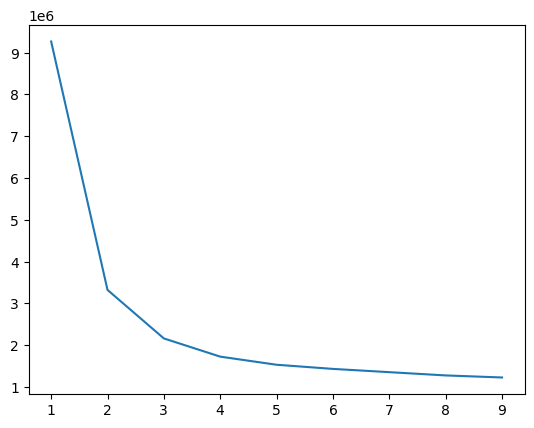

In [109]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.plot(range(1,10), inertia)

#### Answer the following question:

**Question:** What is the best value for `k`?
Answer: **The best value for k = 3**

In [110]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [111]:
# Fit the K-Means model using the scaled data
model.fit(clean_cancer_df)

c:\Users\rodri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rodri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4)

In [112]:
# Predict the clusters to group the carncer survival chance using the scaled data
df_predict = model.predict(clean_cancer_df)

# Print the resulting array of cluster values.
df_predict

array([0, 3, 3, ..., 3, 1, 2])

In [113]:
# Create a copy of the DataFrame
df_cancer_data_predictions = clean_cancer_df.copy()

In [114]:
# Add a new column to the DataFrame with the predicted clusters
df_cancer_data_predictions["clusters"] = df_predict

# Display sample data
df_cancer_data_predictions

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living,oncotree_code_BREAST,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC,clusters
1,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,1,...,0,0,1,0,1,0,0,0,0,0
2,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,0,...,1,0,0,0,1,0,0,0,0,3
3,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,1,...,0,0,1,0,0,0,0,0,1,3
4,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,0,...,1,0,0,0,0,0,0,0,1,1
5,78.77,0,1.0,3.0,1,0.0,4.0,4.062,7.800000,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,70.65,0,5.0,1.0,0,0.0,9.0,2.040,201.166667,1,...,0,0,1,0,0,0,0,0,1,3
1621,75.62,0,5.0,3.0,0,0.0,4.0,4.040,105.200000,0,...,0,1,0,0,1,0,0,0,0,0
1623,52.84,1,5.0,2.0,0,6.0,5.0,5.040,200.333333,1,...,0,0,1,0,0,0,0,0,1,3
1628,48.59,1,5.0,3.0,0,1.0,6.0,5.060,14.700000,0,...,1,0,0,0,1,0,0,0,0,1


In [115]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

df_cancer_data_predictions.hvplot.scatter(
    x="age_at_diagnosis", 
    y="mutation_count",
    by="clusters",
    hover_cols=["x", "y", "mutation_count"]
)

:NdOverlay   [clusters]
   :Scatter   [age_at_diagnosis]   (mutation_count)

In [116]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

df_cancer_data_predictions.hvplot.scatter(
    x="overall_survival_months", 
    y="mutation_count",
    by="clusters",
    hover_cols=["x", "y", "mutation_count"]
)

:NdOverlay   [clusters]
   :Scatter   [overall_survival_months]   (mutation_count)